In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv')
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,NAO
1,18.081287,96.467236,verde,NAO
2,12.884049,95.604222,amarela,SIM
3,18.831052,96.641953,amarela,NAO
4,13.539014,92.978037,preta,NAO


In [2]:
df.shape

(1000, 4)

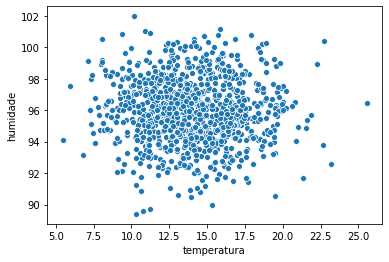

In [3]:
import seaborn as sns

sns.scatterplot(x='temperatura',y='humidade',data=df)

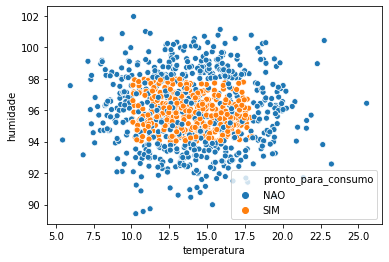

In [4]:
sns.scatterplot(x='temperatura',y='humidade',hue='pronto_para_consumo', data=df)

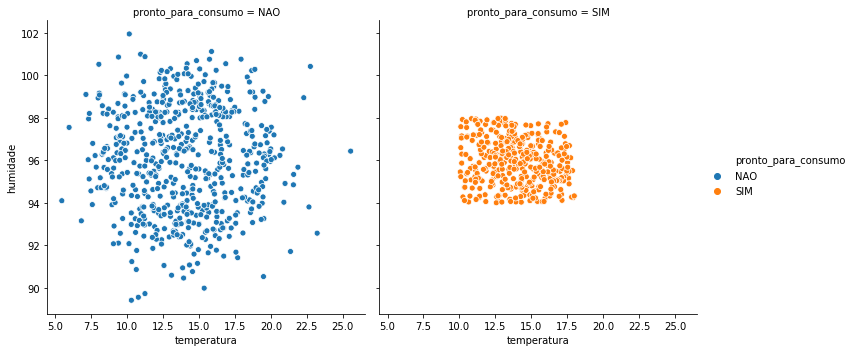

In [5]:
sns.relplot(x='temperatura',y='humidade',hue='pronto_para_consumo', col='pronto_para_consumo', data=df)

In [6]:
pip install plotly_express==0.4.0

In [7]:
import plotly_express as px

fig = px.scatter_3d(df, x="temperatura", y="humidade", z="cor",
                    color="pronto_para_consumo", width=1000, height=700,                    
                    color_discrete_map = {"SIM": "yellow", "NAO":"darkgreen"}, symbol="pronto_para_consumo")
fig.show()

In [0]:
x= df[['temperatura','humidade','cor']]

In [0]:
y= df['pronto_para_consumo']

In [10]:
swap = {
    'preta':0,
    'verde':2,
    'amarela':1
}

df['cor_num'] = df['cor'].map(swap)
df.head()

,temperatura,humidade,cor,pronto_para_consumo,cor_num
0,9.590963,97.007535,verde,NAO,2
1,18.081287,96.467236,verde,NAO,2
2,12.884049,95.604222,amarela,SIM,1
3,18.831052,96.641953,amarela,NAO,1
4,13.539014,92.978037,preta,NAO,0


In [0]:
x= df[['temperatura','humidade','cor_num']]
y= df['pronto_para_consumo']

In [12]:
# Modelo SVC Linear

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=20,  
                                                        test_size = 0.25,
                                                        stratify=y
                                                       )
model = LinearSVC(random_state=20)
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de Acuracidade: {taxa_acuracia*100}")


Taxa de Acuracidade: 39.2


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [13]:
# Modelo Naive_Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=20,  
                                                        test_size = 0.25,
                                                        stratify=y
                                                       )
model = GaussianNB()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de Acuracidade: {taxa_acuracia*100}")


Taxa de Acuracidade: 70.39999999999999


In [0]:
#Construindo a curva que representa o modelo do algoritmo para comparar com o gráfico de resultados conhecidos.

x_min= teste_x['temperatura'].min()
x_max= teste_x['temperatura'].max()
y_min= teste_x['humidade'].min()
y_max= teste_x['humidade'].max()
z_min= teste_x['cor_num'].min()
z_max= teste_x['cor_num'].max()


In [15]:
x_min,x_max,y_min,y_max,z_min,z_max

(7.124219121, 22.287087399999997, 89.41782933, 100.88554620000001, 0, 2)

In [0]:
eixo_x=pd.np.arange(x_min,x_max,(x_max-x_min)/25)
eixo_y=pd.np.arange(y_min,y_max,(y_max-y_min)/25)
eixo_z=pd.np.arange(z_min,z_max,(z_max-z_min)/25)


In [0]:
xx, yy,zz = pd.np.meshgrid(eixo_x,eixo_y, eixo_z)

In [18]:
pontos=pd.np.c_[xx.ravel(),yy.ravel(), zz.ravel()]
print(pontos, end ='\n\n')

[[7.12421912e+00 8.94178293e+01 0.00000000e+00]
 [7.12421912e+00 8.94178293e+01 8.00000000e-02]
 [7.12421912e+00 8.94178293e+01 1.60000000e-01]
 ...
 [2.16805727e+01 1.00426838e+02 1.76000000e+00]
 [2.16805727e+01 1.00426838e+02 1.84000000e+00]
 [2.16805727e+01 1.00426838e+02 1.92000000e+00]]



In [19]:
pontos.shape

(15625, 3)

In [20]:
model = GaussianNB()
model.fit(treino_x,treino_y)

previsoes2 = model.predict(pontos)
previsoes2

array(['NAO', 'NAO', 'NAO', ..., 'NAO', 'NAO', 'NAO'], dtype='<U3')

In [21]:
previsoes2.shape

(15625,)

In [22]:
import pandas as pd

dfp=pd.DataFrame(data=pontos, columns=["temperatura", "humidade", "cor"])
print(dfp)
dfr=pd.DataFrame(data=previsoes2, columns = ["Pronto_para_consumo"])
print(dfr)

       temperatura    humidade   cor
0         7.124219   89.417829  0.00
1         7.124219   89.417829  0.08
2         7.124219   89.417829  0.16
3         7.124219   89.417829  0.24
4         7.124219   89.417829  0.32
...            ...         ...   ...
15620    21.680573  100.426838  1.60
15621    21.680573  100.426838  1.68
15622    21.680573  100.426838  1.76
15623    21.680573  100.426838  1.84
15624    21.680573  100.426838  1.92

[15625 rows x 3 columns]
      Pronto_para_consumo
0                     NAO
1                     NAO
2                     NAO
3                     NAO
4                     NAO
...                   ...
15620                 NAO
15621                 NAO
15622                 NAO
15623                 NAO
15624                 NAO

[15625 rows x 1 columns]


In [0]:
dfp.insert (3,"Pronto_para_consumo", dfr)

In [24]:
dfp

,temperatura,humidade,cor,Pronto_para_consumo
0,7.124219,89.417829,0.00,NAO
1,7.124219,89.417829,0.08,NAO
2,7.124219,89.417829,0.16,NAO
3,7.124219,89.417829,0.24,NAO
4,7.124219,89.417829,0.32,NAO
...,...,...,...,...
15620,21.680573,100.426838,1.60,NAO
15621,21.680573,100.426838,1.68,NAO
15622,21.680573,100.426838,1.76,NAO
15623,21.680573,100.426838,1.84,NAO


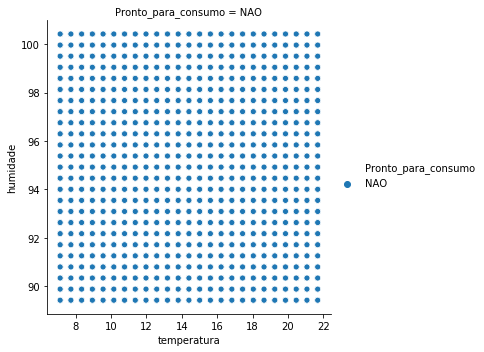

In [25]:
sns.relplot(x='temperatura',y='humidade',hue='Pronto_para_consumo', col='Pronto_para_consumo', data=dfp)

In [26]:
# Grádfico da curva de decisão

import plotly_express as px

fig = px.scatter_3d(dfp, x="temperatura", y="humidade", z="cor",
                    color="Pronto_para_consumo", width=1000, height=700,                    
                    color_discrete_map = {"SIM": "yellow", "NAO":"darkgreen"}, symbol="Pronto_para_consumo")
fig.show()

In [0]:
df2=teste_x

In [28]:
df2

,temperatura,humidade,cor_num
92,11.216037,97.185267,1
821,10.749607,96.085032,1
60,13.443568,99.973381,1
148,16.306618,95.324856,1
908,17.297934,96.309528,1
...,...,...,...
135,10.556266,93.257222,2
360,8.318834,98.218529,1
88,16.618083,94.767262,1
406,18.118290,95.573197,1


In [0]:
pronto_para_consumo=teste_y

In [30]:
pronto_para_consumo

92     SIM
821    SIM
60     NAO
148    SIM
908    SIM
      ... 
135    NAO
360    NAO
88     SIM
406    NAO
262    SIM
Name: pronto_para_consumo, Length: 250, dtype: object

In [0]:
df2.insert (3,"Pronto_para_consumo", pronto_para_consumo)

In [32]:
df2

,temperatura,humidade,cor_num,Pronto_para_consumo
92,11.216037,97.185267,1,SIM
821,10.749607,96.085032,1,SIM
60,13.443568,99.973381,1,NAO
148,16.306618,95.324856,1,SIM
908,17.297934,96.309528,1,SIM
...,...,...,...,...
135,10.556266,93.257222,2,NAO
360,8.318834,98.218529,1,NAO
88,16.618083,94.767262,1,SIM
406,18.118290,95.573197,1,NAO


In [33]:
import plotly_express as px

fig = px.scatter_3d(df2, x="temperatura", y="humidade", z="cor_num",
                    color="Pronto_para_consumo", width=1000, height=700,                    
                    color_discrete_map = {"SIM": "yellow", "NAO":"darkgreen"}, symbol="Pronto_para_consumo")
fig.show()

In [34]:
# Modelo KNeighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=20,  
                                                        test_size = 0.25,
                                                        stratify=y
                                                       )
model = KNeighborsClassifier(n_neighbors=5)
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de Acuracidade: {taxa_acuracia*100}")


Taxa de Acuracidade: 97.2


In [35]:
# Modelo SVC não Linear

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=20,  
                                                        test_size = 0.25,
                                                        stratify=y
                                                       )
model = SVC(random_state=20)
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de Acuracidade: {taxa_acuracia*100}")


Taxa de Acuracidade: 60.8


In [36]:
# Modelo DecisionTree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

model = DecisionTreeClassifier()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) * 100

99.2

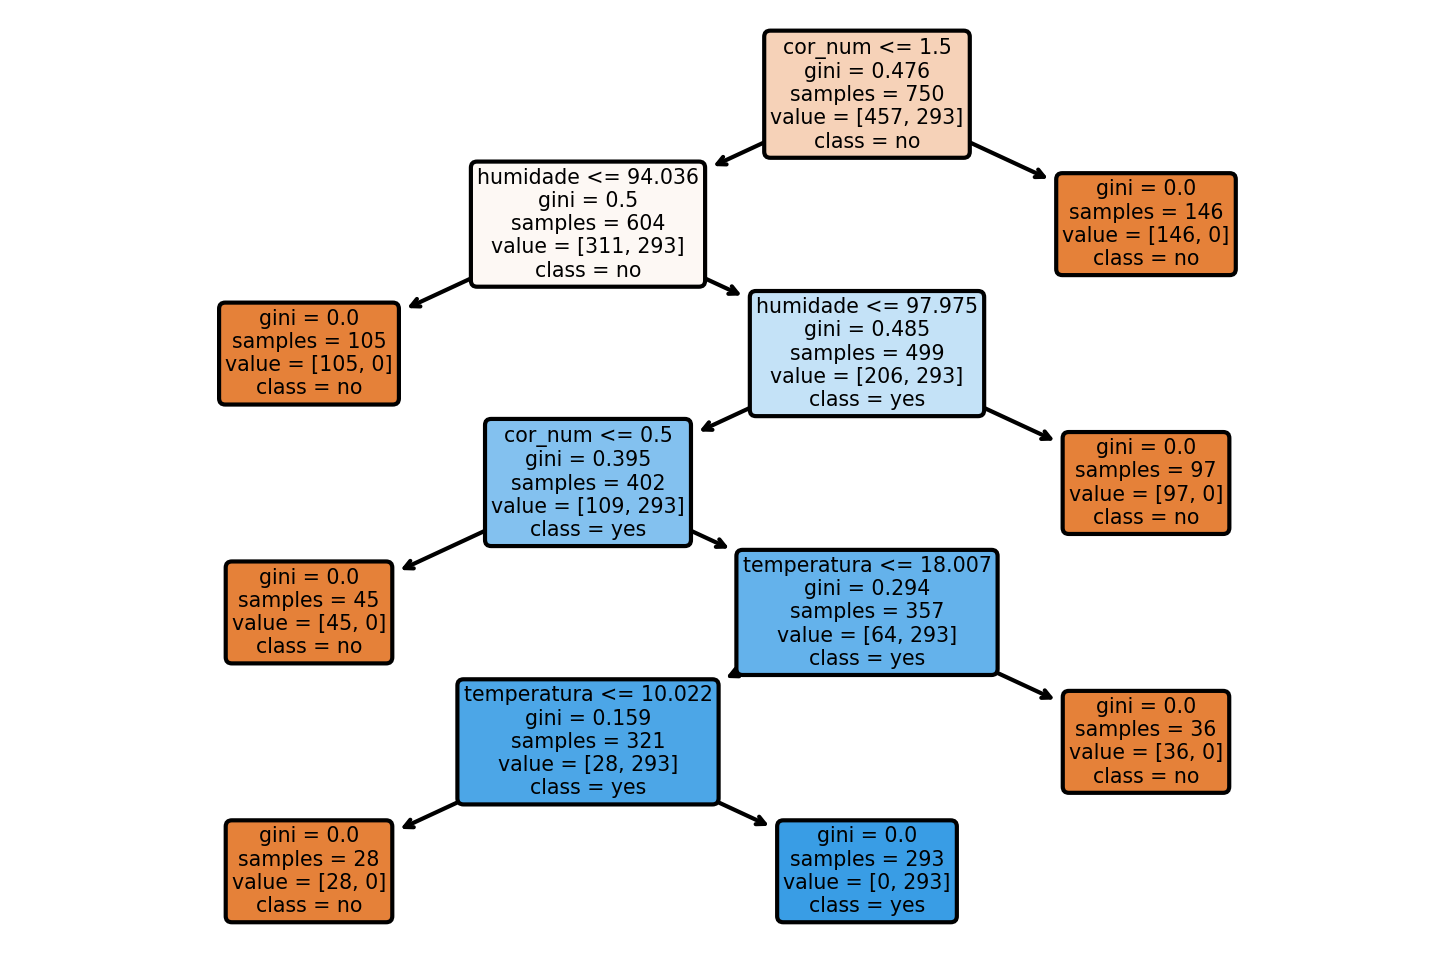

In [37]:
# visualizar regras de decisão da arvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = x.columns

plt.figure(dpi=300)
plot_tree(model, max_depth=100, 
          filled=True, 
          feature_names=features, 
          rounded=True,
          class_names = ['no', 'yes']
         )
plt.show()

In [38]:
len(teste_y)

250

In [0]:
baseline=teste_y

In [40]:
print(baseline)

595    SIM
681    NAO
887    SIM
708    SIM
834    SIM
      ... 
643    NAO
431    NAO
756    NAO
35     SIM
749    NAO
Name: pronto_para_consumo, Length: 250, dtype: object


In [0]:
import string
 
baseline = baseline.replace('NAO', 'SIM')

In [42]:
print(baseline)

595    SIM
681    SIM
887    SIM
708    SIM
834    SIM
      ... 
643    SIM
431    SIM
756    SIM
35     SIM
749    SIM
Name: pronto_para_consumo, Length: 250, dtype: object


In [43]:
# Criando o Baseline para comparaçao aos modelos

accuracy_score(teste_y, baseline)

0.392